## Данные:
Датасет эксперимента в котором тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные \
id – id клиента в эксперименте\
group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)\
events – сколько блюд суммарно было заказано за период

## Задачи:
Проверка гомогенности распределений среди тестовых групп\
Проверка нормальности распределений данных тестовых групп\
A/B/C тест данных тестовых групп\

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import scipy.stats as ss
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
df = pd.read_csv('./5_task_1.csv')

In [4]:
df

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [6]:
{'C_mean' : df[df.group == 'C'].events.mean(),
'A_mean' :df[df.group == 'A'].events.mean(),
'B_mean' :df[df.group == 'B'].events.mean()},
#Средние по тестовым группам

({'C_mean': 27.4703, 'A_mean': 29.5796, 'B_mean': 37.6136},)

In [5]:
pg.homoscedasticity(data = df, dv = 'events', group = 'group') 


,W,pval,equal_var
levene,2.26226,0.104133,True


### Проверка на гомогенность дисперсий всех наборов данных. Нулевая гипотеза о гомогенности дисперсий данных не отклонена. Данные гомогенны.

In [16]:
ss.shapiro(df[df.group == 'A'].events.sample(n=1000, random_state = 17))

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [18]:
ss.shapiro(df[df.group == 'B'].events.sample(n=1000, random_state = 17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [14]:
ss.shapiro(df[df.group == 'C'].events.sample(n=1000, random_state = 17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

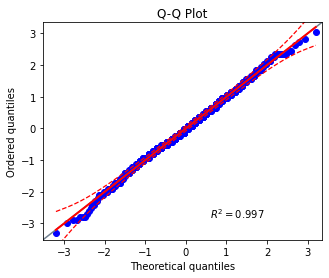

In [21]:
pg.qqplot(df[df.group == 'A'].events.sample(n=1000, random_state = 17))

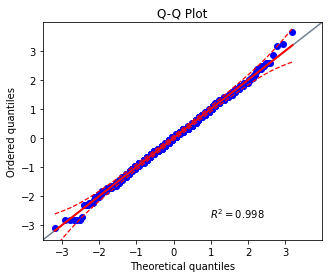

In [20]:
pg.qqplot(df[df.group == 'B'].events.sample(n=1000, random_state = 17))

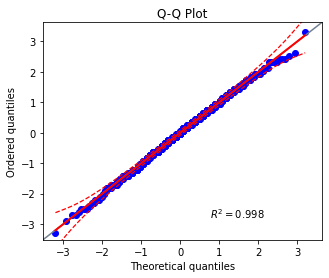

In [22]:
pg.qqplot(df[df.group == 'C'].events.sample(n=1000, random_state = 17))

### Проверка наборов данных на нормальность распределения. Данные распределены нормально на основании теста Шапиро-Уилка. Для сравнения средних по тестовым группам использую однофакторный дисперсионный Anova тест

In [30]:
pg.anova(data = df, dv = 'events', between = 'group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


### Значение статистики равно  2886, а р-уровень значимости составил 0. Следственно различия между средними в тестовых группах обнаружены. Теперь необходимо разобраться между какими именно группами существуют различия

In [38]:
pairwise_tukeyhsd(df.events, df.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


### Для сравнения между группами применил критерий Тьюки. Различия зафиксированы между группами А и С, В и С и А и В. 
## В итоге рекомендуется использовать картинки группы В - квадратные, т.к. в среднем пользователи выбирают их чаще на 27%

## Данные:
Датасет эксперимента в котором проверяли как пользователи отреагируют на изменение формата кнопки оформления заказа.\
id – id клиента в эксперименте\
segment – сегмент (high/low)\
group – вид кнопки (control – старая версия, test – новая версия)\
events – сколько блюд суммарно было заказано за период

## Задачи:
Визуализировать распределения данных в обеих группах\
Произвести A/B/C тестирование с целтю выявление группы с лидирующим средним показателем events

In [3]:
df1 = pd.read_csv('./5_task_2.csv')

In [5]:
df1

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


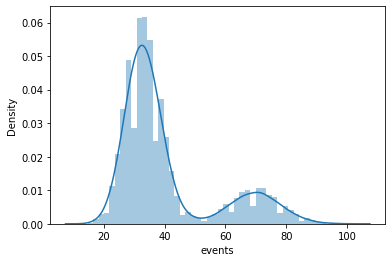

In [12]:
sns.distplot(df1.query("group == 'test'").events)
#Распределение в тестовой группе

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


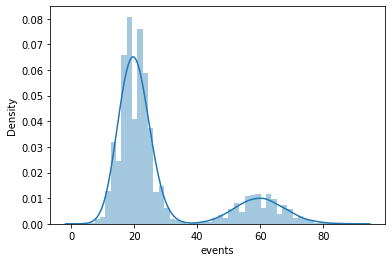

In [13]:
sns.distplot(df1.query("group == 'control'").events)
#Распределение в контрольной группе

In [18]:
df1['comb'] = df1.group + '/' + df1.segment
#Создаю новую колонку объединяющую в себе группу и сегмент пользователя

In [19]:
df1

,id,group,segment,events,comb
0,83440,test,high,78.0,test/high
1,96723,test,high,71.0,test/high
2,68719,test,high,80.0,test/high
3,50399,test,high,80.0,test/high
4,95613,test,high,78.0,test/high
...,...,...,...,...,...
99995,60695,control,low,15.0,control/low
99996,5934,control,low,16.0,control/low
99997,30046,control,low,22.0,control/low
99998,26474,control,low,21.0,control/low


In [20]:
pg.anova(data = df1, dv = 'events', between = ["group", "segment"])
#Произвожу анова тест для выявления статистически значимой разницы между данными по группам, сегментам и группам/сегментам сразу

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


Фактор group оказался ЗНАЧИМЫМ, фактор segment – ЗНАЧИМЫМ, их взаимодействие – 
ЗНАЧИМО

### Статически значимая разница обнаружена между группами, сегментами и группировкой по сегментам и группой. Для попарного сравнения буду исползовать тест Тьюки-Крамера

In [21]:
pg.pairwise_tukey(data = df1, dv = 'events', between = 'comb')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control/high,control/low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control/high,test/high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control/high,test/low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control/low,test/high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control/low,test/low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test/high,test/low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


## Интепретация результатов теста. 
### Для обоих сегментов показатели статистически значимо увеличились по сравнению с контрольной группой.
### Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13
### Разница между control/high и test/high составила около 10

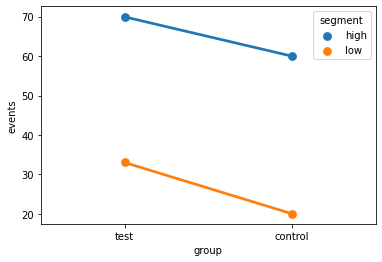

In [23]:
sns.pointplot(x="group", y="events", hue="segment", data=df1)
#График взаимодействия тестовой и контрольной группы по эффекту сегмента

## Судя по графику, для всех групп среднее значение events УВЕЛИЧИЛОСЬ, поэтому решение: ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ